# USD-YEN time series prediction model

## Data Preparation

In [61]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reding USD to JPY data from yahoo finance, date 2012-01-01 to 2022-12-31

data= yf.download("USDJPY=X", start="2012-01-01", end="2022-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2012-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2866 non-null   float64
 1   High       2866 non-null   float64
 2   Low        2866 non-null   float64
 3   Close      2866 non-null   float64
 4   Adj Close  2866 non-null   float64
 5   Volume     2866 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 156.7 KB


In [4]:
# Adding Day and Month columns

data['Day'] = data.index.dayofweek
data['Month'] = data.index.month
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month
Date,,,,,,,,
2012-01-02,77.050003,77.089996,76.870003,77.019997,77.019997,0,0,1
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0,1,1
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0,2,1
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0,3,1
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0,4,1


## Eploratory Data Analysis 

In [5]:
# Describing
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Day,Month
count,2866.000000,2866.000000,2866.000000,2866.000000,2866.000000,2866.0,2866.000000,2866.000000
mean,108.423454,108.771551,108.053221,108.422421,108.422421,0.0,2.000349,6.519539
std,13.084567,13.155277,13.008999,13.084463,13.084463,0.0,1.415077,3.449835
min,76.180000,76.199997,76.050003,76.180000,76.180000,0.0,0.000000,1.000000
25%,103.227499,103.571249,102.840498,103.227249,103.227249,0.0,1.000000,4.000000
50%,109.304001,109.590000,108.990002,109.306000,109.306000,0.0,2.000000,7.000000
75%,113.680000,113.981499,113.328501,113.669998,113.669998,0.0,3.000000,10.000000
max,150.175995,151.936996,149.567001,150.175995,150.175995,0.0,4.000000,12.000000


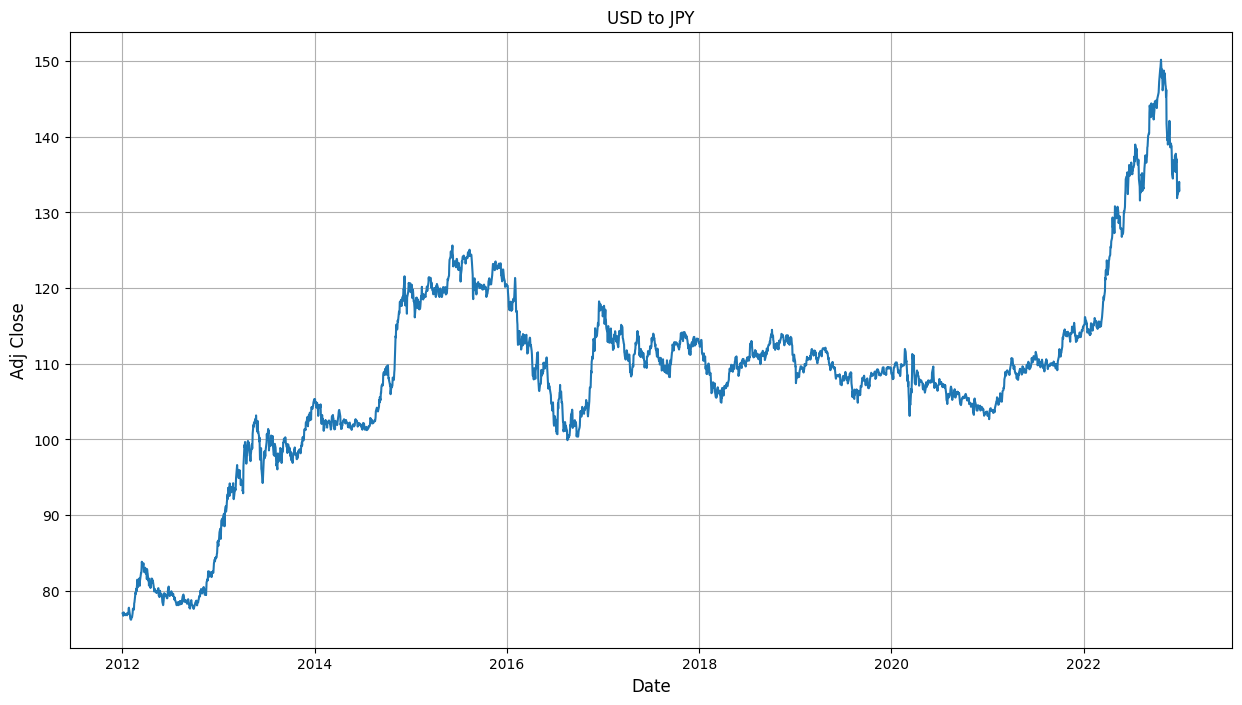

In [6]:
# Plotting the Adj Close price according to data

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
plt.plot(data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

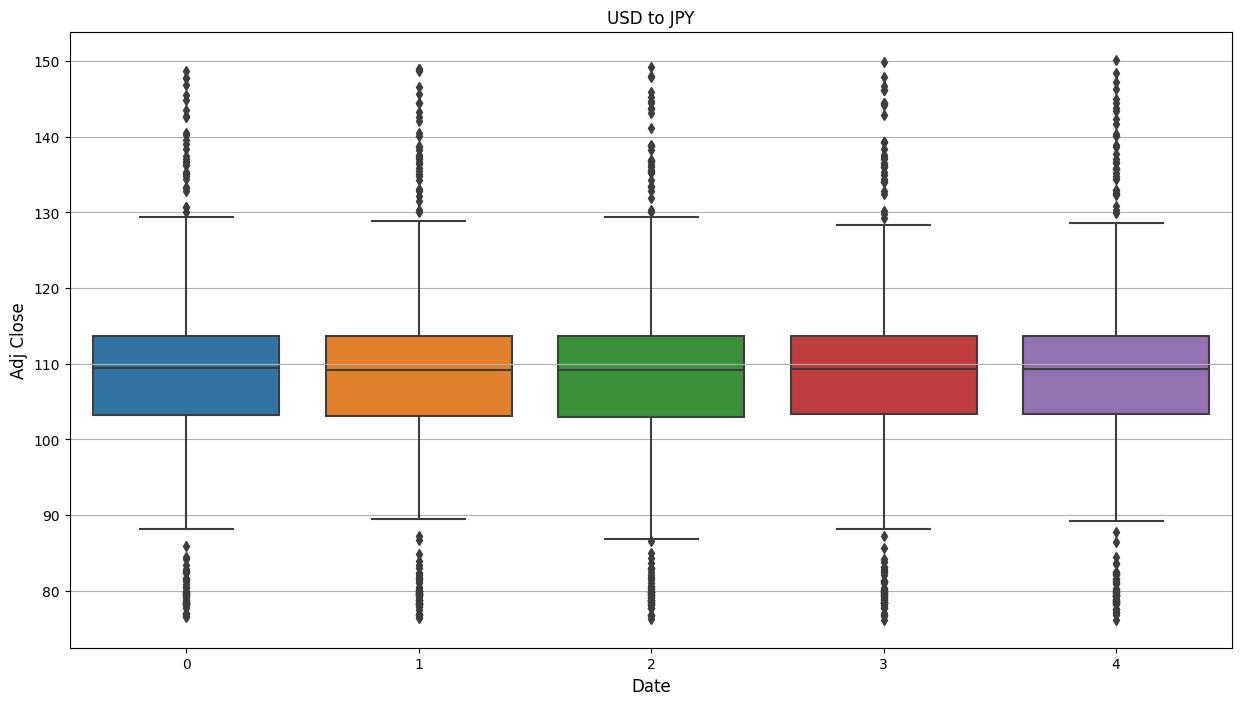

In [7]:
# Plotting Adj Close price against Day

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
sns.boxplot(x=data['Day'], y=data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

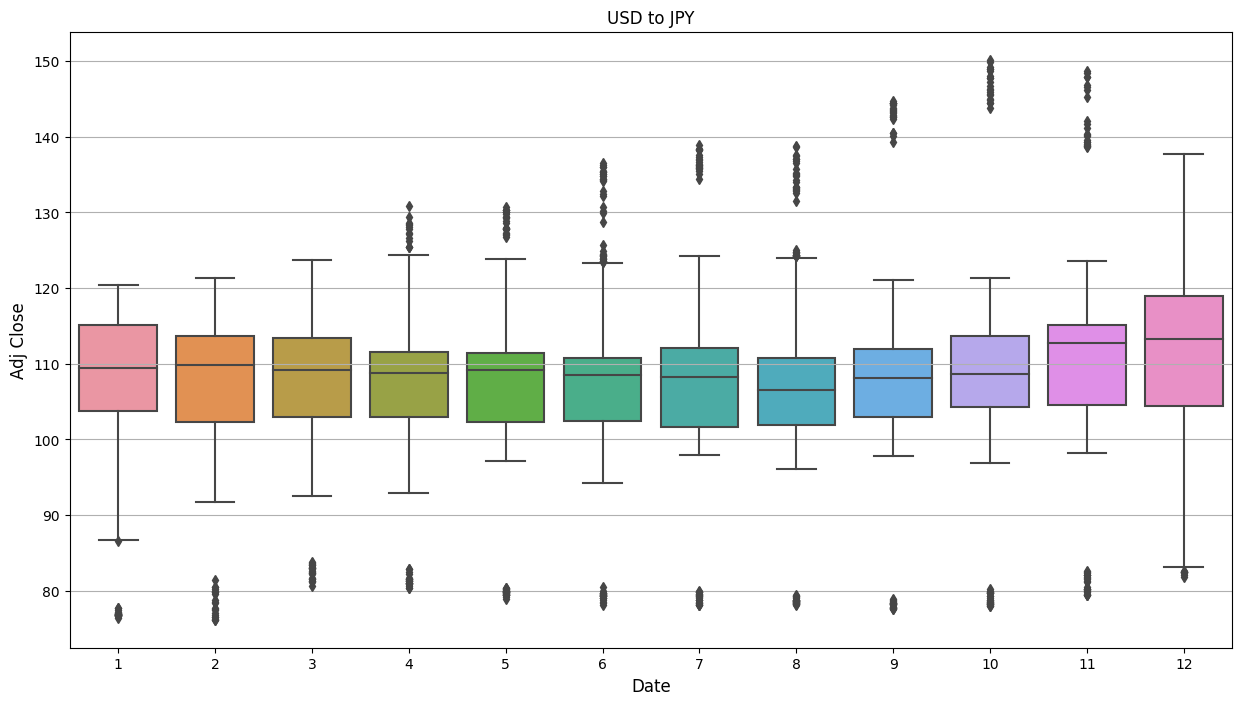

In [8]:
# Plotting Adj Close price against Month

plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('USD to JPY')
sns.boxplot(x=data['Month'], y=data['Adj Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.show()

In [9]:
# Checking Stationay using Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print(f'Since P-value is NOT less than 0.05 we conclude that the series is not stationary.')

ADF Statistic: -1.725136
p-value: 0.418210
Since P-value is NOT less than 0.05 we conclude that the series is not stationary.


In [10]:
# First Order Differencing

data['Adj Close diff'] = data['Adj Close'] - data['Adj Close'].shift(1)
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Adj Close diff
Date,,,,,,,,,
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0,1,1,-0.089996
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0,2,1,-0.208000
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0,3,1,-0.012001
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0,4,1,0.441002
2012-01-09,76.932999,77.000000,76.759003,76.910004,76.910004,0,0,1,-0.240997


In [11]:
# Re-checking Stationay using Augmented Dickey-Fuller test

result = adfuller(data['Adj Close diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print(f'Since P-value is less than 0.05 we conclude that the series is stationary.')
result

ADF Statistic: -24.126608
p-value: 0.000000
Since P-value is less than 0.05 we conclude that the series is stationary.


(-24.12660754838326,
 0.0,
 4,
 2860,
 {'1%': -3.432638524105552,
  '5%': -2.8625511137463935,
  '10%': -2.567308245513228},
 5407.816925900547)

## Train and Test Data

In [12]:
# Features and Target

X = data.drop('Adj Close diff', axis=1)
y = data['Adj Close diff']

print(X.shape, y.shape)

(2865, 8) (2865,)


In [13]:
# Splitting Train and Test
X_train = X.loc[X.index<'2021-01-01']
X_test = X.loc[X.index>='2021-01-01']

y_train = y.loc[X.index<'2021-01-01']
y_test = y.loc[X.index>='2021-01-01']

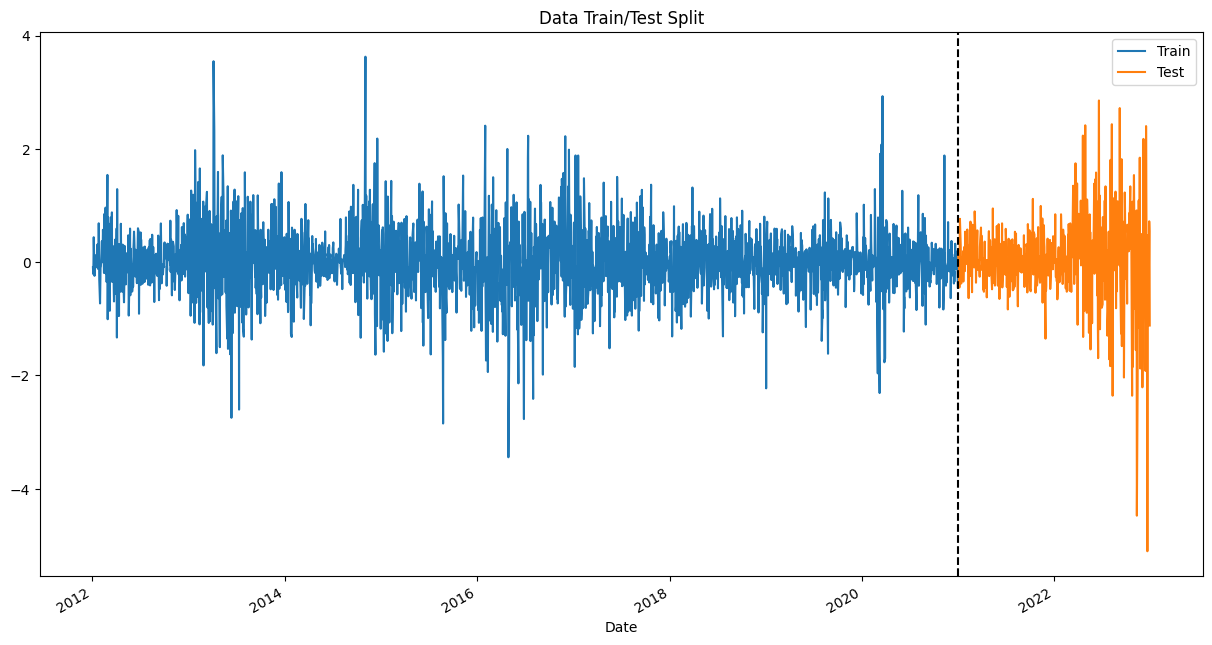

In [14]:
# Visualizing train and test data

fig, ax = plt.subplots(figsize=(15,8))
y_train.plot(ax=ax, label='Train Data', title='Data Train/Test Split')
y_test.plot(ax=ax, label='Test Data')
ax.axvline('2021-01-01', color='black', ls='--')
ax.legend(['Train', 'Test'])
plt.show()

## XGB Model

In [15]:
# Importing libraries

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [16]:
# Model 1: XGBoost Regressor
reg = xgb.XGBRegressor(n_estimators =1000,  early_stopping_rounds=5,learning_rate = 0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.76688	validation_1-rmse:0.86402
[32]	validation_0-rmse:0.68123	validation_1-rmse:0.83809


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Feature Importance

In [17]:
# Feature importance

feature_imp = pd.DataFrame(reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance']).sort_values('importance', ascending=False)

feature_imp

,importance
Low,0.220256
Month,0.186412
Open,0.180116
High,0.177411
Close,0.173057
Day,0.062747
Adj Close,0.000000
Volume,0.000000


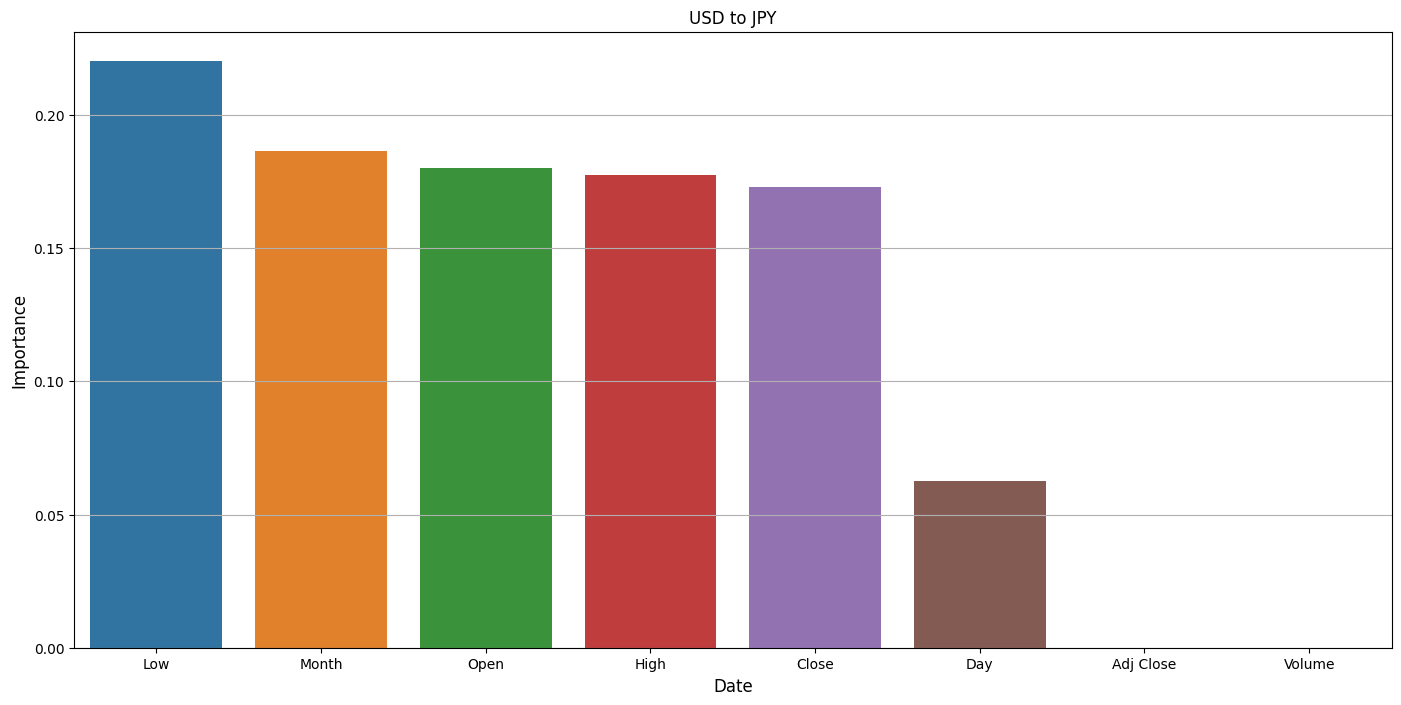

In [18]:
# Plotting Feature importance

plt.figure(figsize=(17,8))
plt.grid(True)
plt.title('USD to JPY')
sns.barplot(x=feature_imp.index, y=feature_imp['importance'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

### Forecast on Test

In [19]:
# Forecast on test data

X_test['prediction'] = reg.predict(X_test)
X_test

,Open,High,Low,Close,Adj Close,Volume,Day,Month,prediction
Date,,,,,,,,,
2021-01-01,103.225998,103.250000,103.225998,103.225998,103.225998,0,4,1,0.371971
2021-01-04,103.244003,103.244003,102.709999,103.238998,103.238998,0,0,1,0.371971
2021-01-05,103.141998,103.180000,102.671997,103.125000,103.125000,0,1,1,0.371971
2021-01-06,102.699997,103.431000,102.589996,102.678001,102.678001,0,2,1,0.371971
2021-01-07,103.028000,103.950996,102.956001,103.024002,103.024002,0,3,1,0.371971
...,...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,0.457966
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,0.457966
2022-12-28,133.485992,134.395004,133.410995,133.485992,133.485992,0,2,12,0.457966


In [20]:
# Merging Data
df = data.merge(X_test[['prediction']], how='left', left_index=True, right_index=True)

In [21]:
data

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Adj Close diff
Date,,,,,,,,,
2012-01-03,76.933998,76.954002,76.653000,76.930000,76.930000,0,1,1,-0.089996
2012-01-04,76.732002,76.814003,76.599998,76.722000,76.722000,0,2,1,-0.208000
2012-01-05,76.710999,77.129997,76.669998,76.709999,76.709999,0,3,1,-0.012001
2012-01-06,77.158997,77.308998,77.015999,77.151001,77.151001,0,4,1,0.441002
2012-01-09,76.932999,77.000000,76.759003,76.910004,76.910004,0,0,1,-0.240997
...,...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,0.432999
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,-0.025986
2022-12-28,133.485992,134.395004,133.410995,133.485992,133.485992,0,2,12,0.721985


Text(0.5, 1.0, 'USD to JPY')

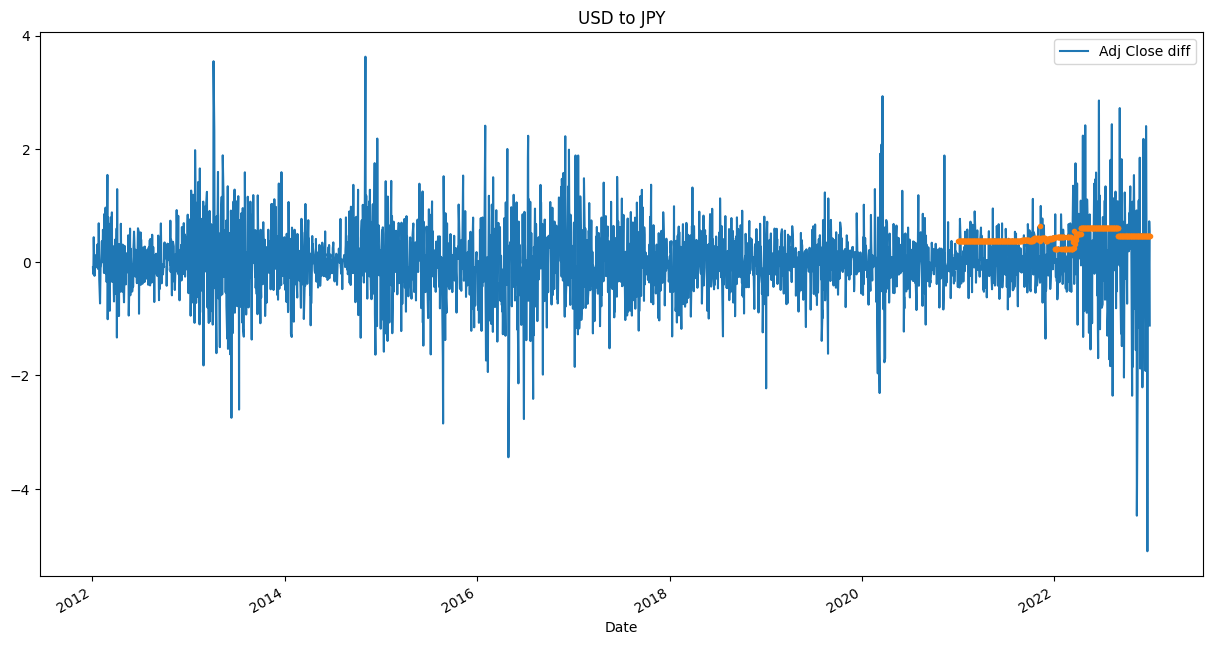

In [22]:
# Plotting prediction and data

ax= data[['Adj Close diff']].plot(figsize=(15,8))
df['prediction'].plot(ax=ax, style='.')
ax.set_title('USD to JPY')

In [23]:
score = np.sqrt(mean_squared_error(y_test, X_test['prediction']))
print( 'RMSE Score on test data: {}'.format(score))

RMSE Score on test data: 0.8378019970462293


### Calculated Error

In [24]:
# Calculate Error

X_test['error'] = np.abs(y_test - X_test['prediction'])

In [25]:
X_test['date']= X_test.index

X_test.groupby('date')['error'].mean().sort_values(ascending=False).head(10)

date
2022-12-21    5.560963
2022-11-11    4.932972
2022-08-11    2.955074
2022-10-24    2.814961
2022-12-02    2.666966
2022-11-14    2.638966
2022-09-23    2.493962
2022-08-02    2.433071
2022-12-14    2.377964
2022-11-24    2.334965
Name: error, dtype: float64

## ARIMA Model

In [26]:
# Importing libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

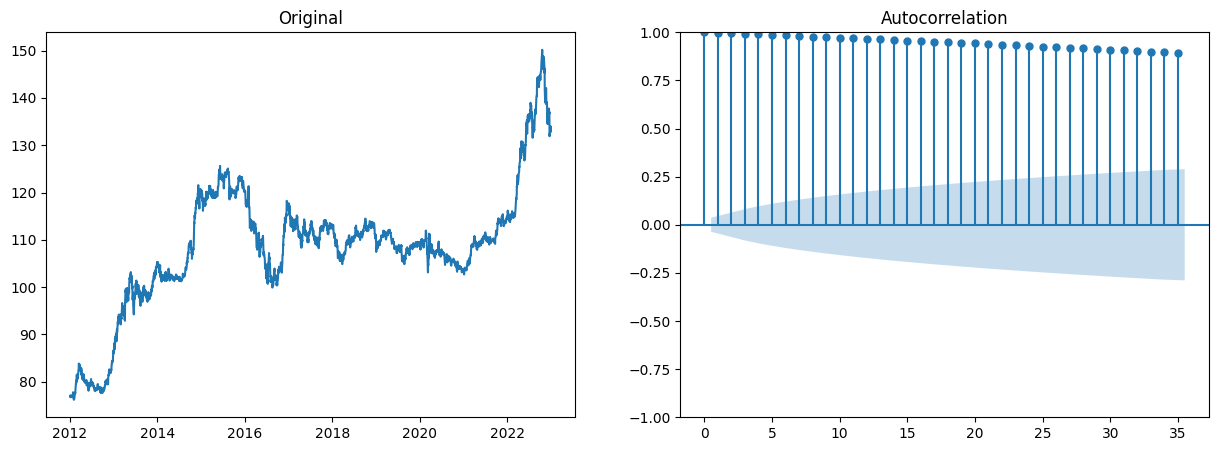

In [27]:
# Plot Autocorrelation (ACF)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(data['Adj Close'])
ax1.set_title('Original')

plot_acf(data['Adj Close'], ax=ax2);

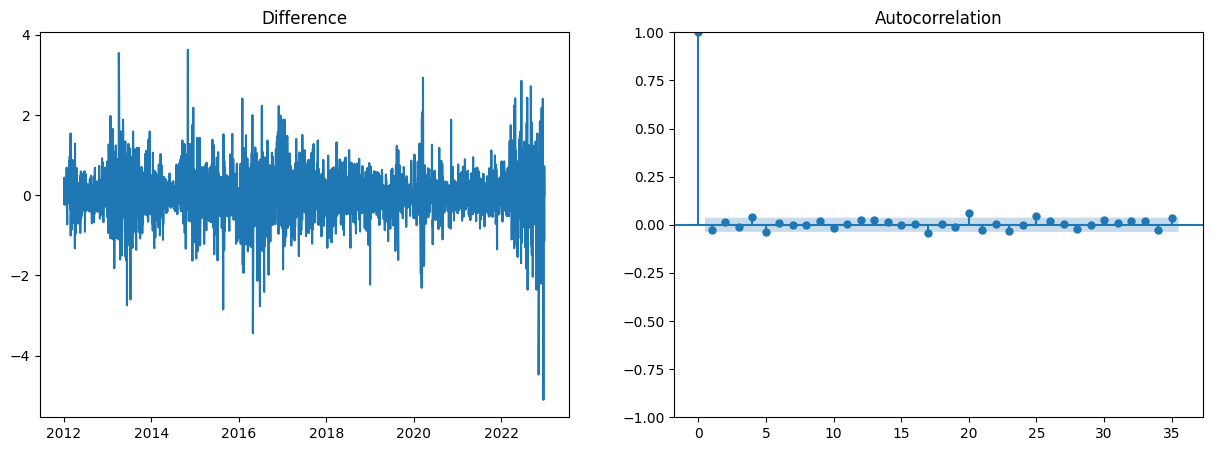

In [28]:
# Differencign the data

data['Adj Close diff'] = data['Adj Close'] - data['Adj Close'].shift(1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(data['Adj Close diff'])
ax1.set_title('Difference')

plot_acf(data['Adj Close diff'].dropna(), ax=ax2);

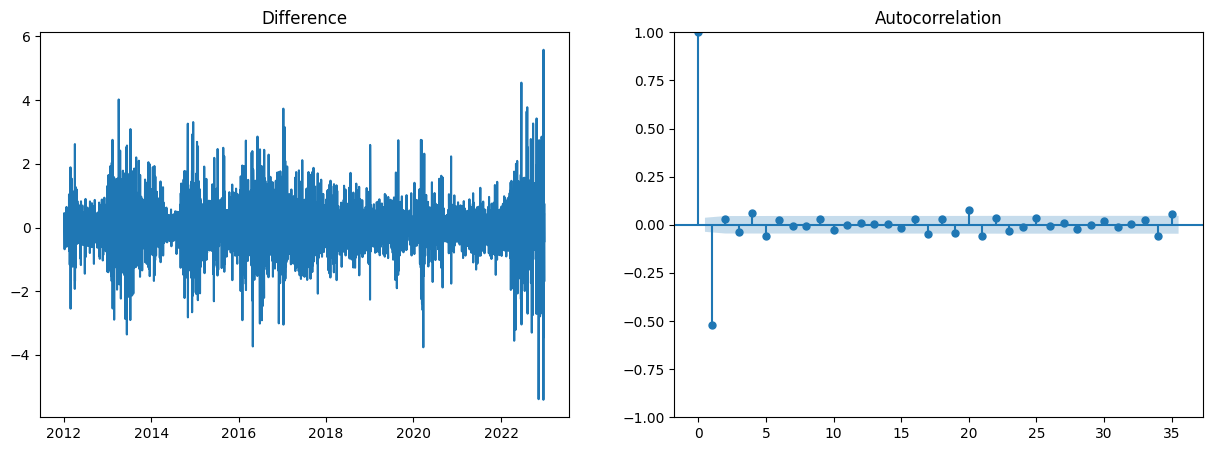

In [29]:
# Differencing again (TWICE)

data['Adj Close diff'] = data['Adj Close diff'] - data['Adj Close diff'].shift(1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(data['Adj Close diff'])
ax1.set_title('Difference')

plot_acf(data['Adj Close diff'].dropna(), ax=ax2);

Using pmdarima to identify p, d, q

In [30]:
# Importing pmdarima
from pmdarima.arima.utils import ndiffs

In [31]:
# identfiying p, d, q

p = ndiffs(data['Adj Close'], test='kpss')
d = ndiffs(data['Adj Close'], test='adf')
q = ndiffs(data['Adj Close'], test='pp')

print(f'p: {p}, d: {d}, q: {q}')

p: 1, d: 1, q: 1


In [32]:
# Importing auto_arima

from pmdarima.arima import auto_arima

In [33]:
stepwise_fit = auto_arima(data['Adj Close'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5442.472, Time=3.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5441.693, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5441.602, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5441.652, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5442.491, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5443.175, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5439.583, Time=1.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5441.459, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5441.457, Time=1.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5443.240, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5440.445, Time=0.35 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 9.625 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2865
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2715.792
Date:                Mon, 02 Sep 2024   AIC                           5439.583
Time:                        13:37:19   BIC                           5463.423
Sample:                             0   HQIC                          5448.179
                               - 2865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0371      0.022      1.678      0.093      -0.006       0.080
ar.L1         -0.8988      0.071    -12.658      0.000      -1.038      -0.760
ma.L1          0.8785      0.077     11.439      0.000       0.728       1.029
sigma2         0.3901      0.005     71.652      0.000       0.379       0.401
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              3361.85
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.28
Prob(H) (two-sided):                  0.13   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fitting ARIMA model

In [34]:
# Splitting data into train and test

train = data.iloc[:-500]
test = data.iloc[-500:]

print(train.shape, test.shape)

(2365, 9) (500, 9)


In [35]:
# Fitting the model

model = ARIMA(train['Adj Close'], order=(1,2,1))
result = model.fit()
result.summary()

/home/karush/.pyenv/versions/yen-usd/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/karush/.pyenv/versions/yen-usd/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/karush/.pyenv/versions/yen-usd/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2365
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2122.740
Date:                Mon, 02 Sep 2024   AIC                           4251.480
Time:                        13:37:19   BIC                           4268.783
Sample:                             0   HQIC                          4257.780
                               - 2365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0288      0.016     -1.829      0.067      -0.060       0.002
ma.L1         -0.9984      0.001   -678.573      0.000      -1.001      -0.996
sigma2         0.3521      0.006     56.107      0.000       0.340       0.364
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1190.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([7.31525964e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.71542839e-01, 1.31674674e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.31525964e-05]),
 array([-38.67299993, -32.89284992, -27.11269991, -21.3325499 ,
        -15.55239989,  -9.77224987,  -3.99209986,   1.78805015,
          7.56820016,  13.34835017,  19.12850019,  24.9086502 ,
         30.68880021,  36.46895022,  42.24910023,  48.02925025,
         53.80940026,  59.58955027,  65.36970028,  71.14985029,
         76.93000031]),
 <BarContainer object of 20 artists>)

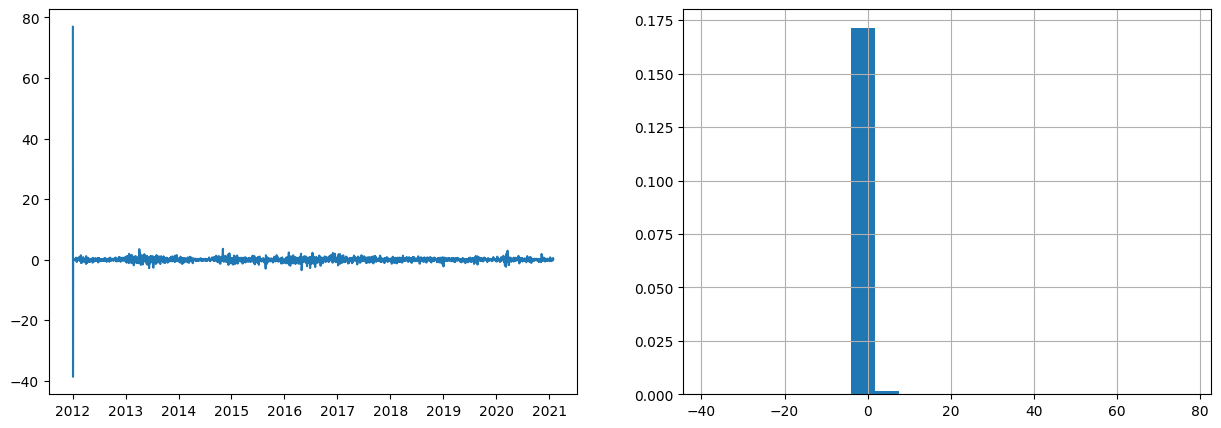

In [36]:
# Plot the residuals

residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plt.grid(True)
ax1.plot(residuals)
ax2.hist(residuals, bins=20, density=True)

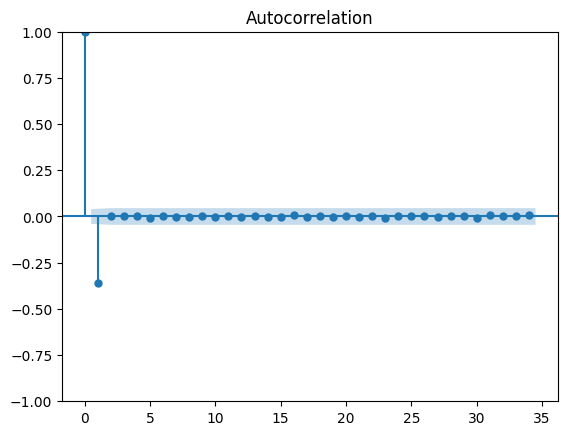

In [37]:
# Plot ACF of residuals to check for randomness
plot_acf(residuals)
plt.show()

### Making predictions

In [38]:
# Making predictions

start = len(train)
end = len(train) + len(test) - 1

pred = result.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Resetting the index as we need dates for plotting
pred.index = data.index[start:end+1]

print(pred)

Date
2021-02-01    104.281820
2021-02-02    104.277170
2021-02-03    104.272389
2021-02-04    104.267611
2021-02-05    104.262834
                 ...    
2022-12-26    101.917106
2022-12-27    101.912329
2022-12-28    101.907551
2022-12-29    101.902774
2022-12-30    101.897996
Name: ARIMA Predictions, Length: 500, dtype: float64


/home/karush/.pyenv/versions/yen-usd/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

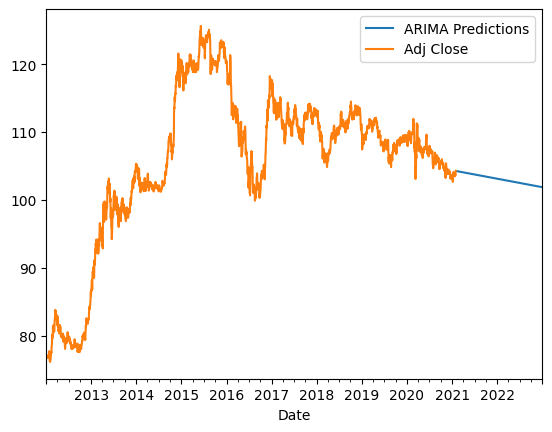

In [39]:
# Ploting the predictions against test set

pred.plot(legend=True)
train['Adj Close'].plot(legend=True)

In [40]:
train['Adj Close'].mean()

105.70260682378209

In [41]:
rmse = sqrt(mean_squared_error(test['Adj Close'], pred))
print('RMSE Score on test data: {}'.format(rmse))

RMSE Score on test data: 22.859152239927365


### Model Evaluation

In [42]:
# Model Evaluation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt


rmse = sqrt(mean_squared_error(y_test, X_test['prediction']))
print('RMSE Score on test data: {}'.format(rmse))

mae = mean_absolute_error(y_test, X_test['prediction'])
print('MAE Score on test data: {}'.format(mae))

r2 = r2_score(y_test, X_test['prediction'])
print('R2 Score on test data: {}'.format(r2))

RMSE Score on test data: 0.8378019970462293
MAE Score on test data: 0.5848610045070154
R2 Score on test data: -0.26959214933845455


## LSTM 

In [47]:
# importing libraries for LSTM

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from matplotlib import pyplot


In [54]:
# Using Adj Close as the target variable

close_data = data['Adj Close'].values

# Reshaping the data for MinMax
close_data = close_data.reshape(-1,1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(close_data)

print(scaled_data)


[[0.01013568]
 [0.00732472]
 [0.00716253]
 ...
 [0.77444722]
 [0.78185308]
 [0.76674421]]


In [55]:
# Define the look-back period (number of previous time steps to use as input variables)
look_back = 60

# Create the dataset with a specific look-back period
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create training and testing datasets
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [56]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [57]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2231/2231 [==============================] - 81s 35ms/step - loss: 0.0011
Epoch 2/10
2231/2231 [==============================] - 99s 44ms/step - loss: 3.3665e-04
Epoch 3/10
2231/2231 [==============================] - 108s 48ms/step - loss: 2.4921e-04
Epoch 4/10
2231/2231 [==============================] - 106s 48ms/step - loss: 1.8459e-04
Epoch 5/10
2231/2231 [==============================] - 101s 45ms/step - loss: 1.6772e-04
Epoch 6/10
2231/2231 [==============================] - 110s 49ms/step - loss: 1.6529e-04
Epoch 7/10
2231/2231 [==============================] - 106s 47ms/step - loss: 1.5618e-04
Epoch 8/10
2231/2231 [==============================] - 113s 51ms/step - loss: 1.4843e-04
Epoch 9/10
2231/2231 [==============================] - 103s 46ms/step - loss: 1.4160e-04
Epoch 10/10
2231/2231 [==============================] - 111s 50ms/step - loss: 1.5437e-04


In [59]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 [==============================] - 0s 21ms/step


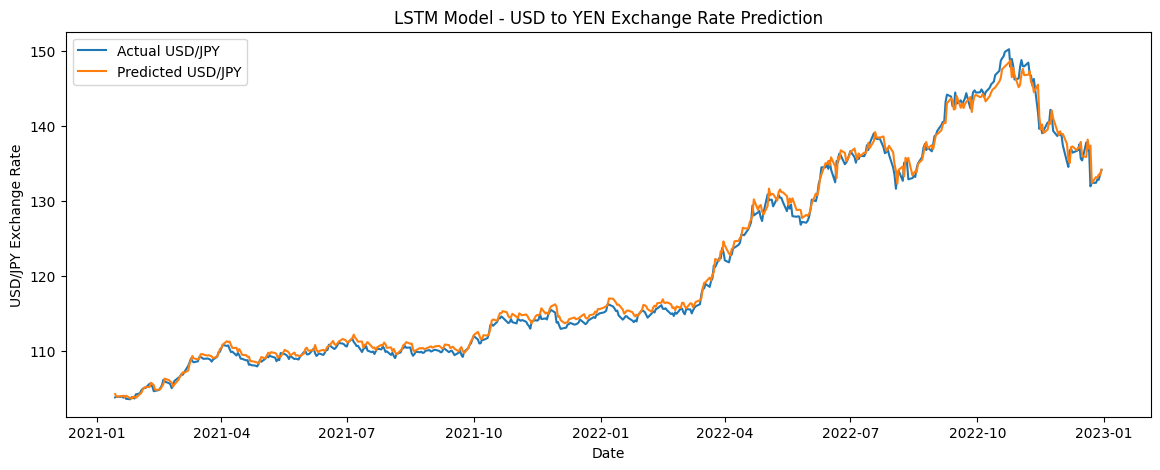

In [60]:
# Plot the data
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size + look_back + 1:], y_test, label='Actual USD/JPY')
plt.plot(data.index[train_size + look_back + 1:], predictions, label='Predicted USD/JPY')
plt.xlabel('Date')
plt.ylabel('USD/JPY Exchange Rate')
plt.title('LSTM Model - USD to YEN Exchange Rate Prediction')
plt.legend()
plt.show()
